In [2]:
import itertools as it
import pandas as pd
from collections import defaultdict,Counter
import json
import numpy as np
import time
import argparse
import seaborn as sns
import statsmodels
import math
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import poisson
from seaborn_qqplot import pplot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multitest import multipletests
from IPython.display import display_html 
import statistics as stats
import scipy
#pd.set_option("display.max_rows", None)

## Read in Samples

In [3]:
complete_aplus_samples = ["CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD8_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD8_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Monocyte_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Monocyte_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Monocyte_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Naive_B_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Naive_B_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Naive_B_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Naive_B_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Natural_Killer_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Natural_Killer_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged",
"Natural_Killer_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged"]

In [4]:
complete_bplus_samples = ["CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.biorep_merged",
"CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.biorep_merged",
"Caudate.GSE147672.Homo_Sapiens.H3K27ac.biorep_merged",
"DND41.GSE165207.Homo_Sapiens.H3K27ac.biorep_merged",
"GM12878.GSE101498.Homo_Sapiens.H3K27ac.biorep_merged",
"Hippocampus.GSE147672.Homo_Sapiens.H3K27ac.biorep_merged",
"K562.GSE101498.Homo_Sapiens.H3K27ac.biorep_merged",
"KBM7-MED14-dTAG_2h_DMSO.GSE139466.Homo_Sapiens.H3K27ac.biorep_merged",
"KBM7-MED14-dTAG_2h_dTAG7.GSE139466.Homo_Sapiens.H3K27ac.biorep_merged",
"M14-STAG2-KD.GSE156772.Homo_Sapiens.H3K27ac.biorep_merged",
"M14-WT.GSE156772.Homo_Sapiens.H3K27ac.biorep_merged",
"MDA-MB-231-PVT1sgRNAR2.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged",
"MDA-MB-231-PVT1sgRNAR3.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged",
"MDA-MB-231-sgRNA-Ctrl.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged",
"Middle-Frontal-Gyrus.GSE147672.Homo_Sapiens.H3K27ac.biorep_merged",
"MyLa.GSE101498.Homo_Sapiens.H3K27ac.biorep_merged",
"Naive_Tcells.GSE101498.Homo_Sapiens.H3K27ac.biorep_merged",
"PAEC-Control.GSE152900.Homo_Sapiens.H3K27ac.biorep_merged",
"PAEC-LSS.GSE152900.Homo_Sapiens.H3K27ac.biorep_merged",
"PAEC-siRNA-KLF2-4.GSE152900.Homo_Sapiens.H3K27ac.biorep_merged",
"Parietal-Lobe.GSE147672.Homo_Sapiens.H3K27ac.biorep_merged",
"Primary-Foreskin-Keratinocytes-Day0.GSE158642.Homo_Sapiens.H3K27ac.biorep_merged",
"Primary-Foreskin-Keratinocytes-Day3.GSE158642.Homo_Sapiens.H3K27ac.biorep_merged",
"Primary-Foreskin-Keratinocytes-Day6.GSE158642.Homo_Sapiens.H3K27ac.biorep_merged",
"Primary-T-D0.GSE168881.Homo_Sapiens.H3K27ac.biorep_merged",
"Retina.GSE196235.Homo_Sapiens.H3K27ac.biorep_merged",
"SNU16-dCas9-KRAB.GSE159985.Homo_Sapiens.H3K27ac.biorep_merged",
"Substantia-Nigra.GSE147672.Homo_Sapiens.H3K27ac.biorep_merged",
"Th17.GSE101498.Homo_Sapiens.H3K27ac.biorep_merged",
"Treg.GSE101498.Homo_Sapiens.H3K27ac.biorep_merged"]

In [5]:
samples = {"CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged": "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/motif_analysis/meme/fimo/a_plus/CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged/summarize_results/summary.txt",
           "Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged": "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/motif_analysis/meme/fimo/a_plus/Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged/summarize_results/summary.txt",
          "CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged": "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/motif_analysis/meme/fimo/a_plus/CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged/summarize_results/summary.txt",
          "Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged":  "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/motif_analysis/meme/fimo/a_plus/Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged/summarize_results/summary.txt",
          "Naive_B_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged": "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/motif_analysis/meme/fimo/a_plus/Naive_B_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged/summarize_results/summary.txt",
          "Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged": "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/motif_analysis/meme/fimo/a_plus/Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged/summarize_results/summary.txt"}

samples_control = ["A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.biorep_merged",
"Hela-S3-OE.GSE108869.Homo_Sapiens.CTCF.biorep_merged",
"HeLa-S3-shBHLHE40.GSE137849.Homo_Sapiens.CTCF.biorep_merged",
"HeLa-S3-shcontrol.GSE137849.Homo_Sapiens.CTCF.biorep_merged",
"NSD2-High-NTKO.GSE131651.Homo_Sapiens.CTCF.biorep_merged",
"NSD2-Low-TKO.GSE131651.Homo_Sapiens.CTCF.biorep_merged",
"OCI-AML3-WT.GSE111537.Homo_Sapiens.CTCF.biorep_merged"]

# Read in a test sample to check structure of data
sample_name ="CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged"
sample_file_path = samples[sample_name]

columns = ['loop_chr1','loop_start1','loop_end1','loop_chr2','loop_start2','loop_end2','motif_ID_1','motif_name_1','motif_ID_2','motif_name_2']
df = pd.read_csv(sample_file_path,sep="\t",header =0)
## Drop about half of the loops
# Drop any anchors with no motifs in either anchor
filter_df = df[(df['motif_ID_1']!="None" ) & (df['motif_ID_2']!="None")].reset_index(drop=True)
filter_df

,chr1,start1,end1,chr2,start2,end2,motif_ID_1,motif_name_1,motif_ID_2,motif_name_2
0,chr1,775000,780000,chr1,1230000,1235000,"MA0609.2,MA0060.3,MA1644.1,MA1937.1,MA1958.1,M...","CREM,NFYA,NFYC,ERF::HOXB13,HOXD12::ELK1,MYOD1,...","MA0830.2,MA1631.1,MA1596.1,MA1587.1,MA1929.1,M...","TCF4,ASCL1,ZNF460,ZNF135,CTCF,HOXD12,ZNF93,EGR..."
1,chr1,1010000,1015000,chr1,1030000,1035000,"MA1596.1,MA1418.1,MA0050.2,MA0517.1,MA0051.1,M...","ZNF460,IRF3,IRF1,STAT1::STAT2,IRF2,IRF9,IRF8,T...","MA1652.1,MA0609.2,MA1929.1,MA0154.4,MA1599.1","ZKSCAN5,CREM,CTCF,EBF1,ZNF682"
2,chr1,1015000,1020000,chr1,1230000,1235000,"MA0646.1,MA0697.1,MA0751.1,MA1584.1,MA0696.1","GCM1,ZIC3,ZIC4,ZIC5,ZIC1","MA0830.2,MA1631.1,MA1596.1,MA1587.1,MA1929.1,M...","TCF4,ASCL1,ZNF460,ZNF135,CTCF,HOXD12,ZNF93,EGR..."
3,chr1,1035000,1040000,chr1,1230000,1235000,MA1961.1,PATZ1,"MA0830.2,MA1631.1,MA1596.1,MA1587.1,MA1929.1,M...","TCF4,ASCL1,ZNF460,ZNF135,CTCF,HOXD12,ZNF93,EGR..."
4,chr1,1065000,1070000,chr1,1230000,1235000,"MA0863.1,MA1713.1,MA1522.1,MA1987.1,MA1730.1,M...","MTF1,ZNF610,MAZ,ZNF701,ZNF708,ZNF460,PATZ1,KLF...","MA0830.2,MA1631.1,MA1596.1,MA1587.1,MA1929.1,M...","TCF4,ASCL1,ZNF460,ZNF135,CTCF,HOXD12,ZNF93,EGR..."
...,...,...,...,...,...,...,...,...,...,...
16334,chr9,137450000,137455000,chr9,137550000,137555000,"MA0003.4,MA0814.2,MA0812.1,MA0753.2,MA0039.4,M...","TFAP2A,TFAP2C,TFAP2B,ZNF740,KLF4,ZNF281,PATZ1,...","MA0504.1,MA1723.1,MA1587.1,MA0599.1,MA1513.1,M...","NR2C2,PRDM9,ZNF135,KLF5,KLF15,PATZ1,KLF9,KLF16..."
16335,chr9,137455000,137460000,chr9,137550000,137555000,"MA0839.1,MA1548.1,MA1973.1,MA1929.1,MA0814.2,M...","CREB3L1,PLAGL2,ZKSCAN3,CTCF,TFAP2C,RREB1,ZNF74...","MA0504.1,MA1723.1,MA1587.1,MA0599.1,MA1513.1,M...","NR2C2,PRDM9,ZNF135,KLF5,KLF15,PATZ1,KLF9,KLF16..."
16336,chr9,137550000,137555000,chr9,137600000,137605000,"MA0504.1,MA1723.1,MA1587.1,MA0599.1,MA1513.1,M...","NR2C2,PRDM9,ZNF135,KLF5,KLF15,PATZ1,KLF9,KLF16...","MA1596.1,MA1587.1,MA1584.1,MA0697.1,MA0751.1,M...","ZNF460,ZNF135,ZIC5,ZIC3,ZIC4,SP8,SP9,PATZ1,SP3..."
16337,chr9,137575000,137580000,chr9,137615000,137620000,"MA1596.1,MA1587.1,MA1513.1,MA0741.1,MA1512.1,M...","ZNF460,ZNF135,KLF15,KLF16,KLF11,SP8,SP9,PRDM9,...","MA0093.3,MA0684.2,MA1713.1,MA0504.1,MA1550.1,M...","USF1,RUNX3,ZNF610,NR2C2,PPARD,RXRB,RXRG,NR2F1,..."


## Full Sample Visualization through Bubble Charts

- Below is a great to do an aggregate analysis for all samples of A+, B+, and control

### Group: A+
- Only have to run below once.  Saves top N occuring motifs and calculates Q-values from subset
- Without subset, there will probably be too many pairs and the number of significant pair motifs will be near 0

In [15]:
### Number of Top Motifs you want to see (Can be user specified)
top_motif_count = 50
# Loop through all samples of interest
k = 0
sample_batch = "a_plus"
for sample_name in complete_aplus_samples:
    sample_file_path = "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/motif_analysis/meme/fimo/"+sample_batch+"/"+sample_name+"/summarize_results/summary.txt"
    df = pd.read_csv(sample_file_path,sep="\t",header =0)
    filter_df = df[(df['motif_ID_1']!="None" ) & (df['motif_ID_2']!="None")].reset_index(drop=True)
    # Initialize the anchor slots data structure for entire set
    anchor_slots = {}
    anchor_ids = []
    # Loop through all enteries in dataframe
    for i, sr in df.iterrows():

        # Create anchor ids
        anchor1_id = '{}-{}-{}'.format(sr["chr1"], sr["start1"], sr["end1"])
        anchor2_id = '{}-{}-{}'.format(sr["chr2"], sr["start2"], sr["end2"])

        if anchor1_id not in anchor_slots:
            motifs1 = list(sr.motif_name_1.split(','))
            anchor_slots[anchor1_id] = list(set(motifs1))
            anchor_ids.append(anchor1_id)

        if anchor2_id not in anchor_slots:
            motifs2 = list(sr.motif_name_2.split(','))
            anchor_slots[anchor2_id] = list(set(motifs2))
            anchor_ids.append(anchor2_id)
    total_loops = len(df)
    total_anchors = len(anchor_slots)

    anchors_with_mps = [anchor for anchor, mp_list in anchor_slots.items() if mp_list[0] != "None"]
    total_anchors_with_mps = len(anchors_with_mps)

    anchors_without_mps = [anchor for anchor, mp_list in anchor_slots.items() if mp_list[0] == "None"]
    total_anchors_without_mps = len(anchors_without_mps)

    all_motifs = []
    for anchor, mp_list in anchor_slots.items():
        all_motifs.extend(mp_list)
    total_motif_events = len(all_motifs)
    total_motifs = len(set(all_motifs))

    ## Create list of anchor IDs ##
    filter_anchor_slots = {}
    filter_anchor_ids = []
    ## For dataset of analysis
    for i, sr in filter_df.iterrows():

        # Create anchor ids
        filter_anchor1_id = '{}-{}-{}'.format(sr["chr1"], sr["start1"], sr["end1"])
        filter_anchor2_id = '{}-{}-{}'.format(sr["chr2"], sr["start2"], sr["end2"])

        if filter_anchor1_id not in filter_anchor_slots:
            filter_motifs1 = list(sr.motif_name_1.split(','))
            filter_anchor_slots[filter_anchor1_id] = list(set(filter_motifs1))
            filter_anchor_ids.append(filter_anchor1_id)

        if filter_anchor2_id not in filter_anchor_slots:
            filter_motifs2 = list(sr.motif_name_2.split(','))
            filter_anchor_slots[filter_anchor2_id] = list(set(filter_motifs2))
            filter_anchor_ids.append(filter_anchor2_id)

    filter_total_loops = len(filter_df)
    filter_total_anchors = len(filter_anchor_slots)

    filter_anchors_with_mps = [anchor for anchor, mp_list in filter_anchor_slots.items() if mp_list[0] != "None"]
    filter_total_anchors_with_mps = len(filter_anchors_with_mps)

    filter_anchors_without_mps = [anchor for anchor, mp_list in filter_anchor_slots.items() if mp_list[0] == "None"]
    filter_total_anchors_without_mps = len(filter_anchors_without_mps)

    filter_all_motifs = []
    for anchor, mp_list in filter_anchor_slots.items():
        filter_all_motifs.extend(mp_list)
    filter_total_motif_events = len(filter_all_motifs)
    filter_total_motifs = len(set(filter_all_motifs))

    filter_total_anchors

    # Set up counter
    motif_pair_counter = Counter()

    # Loop through all enteries in dataframe
    uniq_motif_pairs = []
    for num in range(len(filter_df)):

        # Get motifs 1
        motifs1 = list(filter_df.motif_name_1[num].split(','))

        # Get motifs 2
        motifs2 = list(filter_df.motif_name_2[num].split(','))

        # Get the cross product of all 
        combos = list(it.product(motifs1, motifs2))

        # Filter data to take into account (X,Y) vs (Y,X)
        combos = [(x[0], x[1]) if x[0] < x[1] else (x[1], x[0]) for x in combos]

        # Get chromsome attributes for Chromsome 1
        chr1_name = str(filter_df["chr1"][num])
        chr1_start = str(filter_df["start1"][num])
        chr1_end = str(filter_df["end1"][num])

        # Get chromosome attributes for Chromsome 2
        chr2_name = str(filter_df["chr2"][num])
        chr2_start = str(filter_df["start2"][num])
        chr2_end = str(filter_df["end2"][num])

        # Record them in counter
        for p in combos:
            motif_pair_counter[p] += 1
            uniq_motif_pairs.append(p)
    # Get unique list of motifs
    uniq_motif_pairs = list(set(uniq_motif_pairs))
    # Count number of raw motifs across anchors
    count_df = []
    for motif,value in Counter(filter_all_motifs).items():
        entry = {"Motif" : motif,"Count":value,"Percent":(value/len(filter_all_motifs))*100}
        count_df.append(entry)
    count_df = pd.DataFrame(count_df)
    # Get frequency of motifs
    top_freq_motifs = count_df.sort_values("Percent",ascending=False).head(top_motif_count)["Motif"].tolist()
    top_motifs_list = '|'.join(top_freq_motifs)
    ### Read in data of sample
    mp_data = pd.read_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/"+sample_batch+"/"+sample_name+"/P_values_agg")
    tmp = mp_data["Pair"].str.split(",", n = 1, expand = True)
    # Split up pairs
    mp_data["Pair_1"] = tmp[0]
    mp_data["Pair_2"] = tmp[1]
    # Keep motif pairs where both motifs show up in top frequent motifs
    mp_data["Contain_1"] = mp_data["Pair_1"].str.contains(top_motifs_list)
    mp_data["Contain_2"] = mp_data["Pair_2"].str.contains(top_motifs_list)
    data_qvalues = mp_data[(mp_data["Contain_1"]==True) & (mp_data["Contain_2"]==True)]
    final_data_qvalues = data_qvalues.copy()
    # Run Q value correction
    final_data_qvalues["Q_value"] = list(multipletests(data_qvalues['P_value'], method='fdr_bh',is_sorted=False)[1])
    final_data_qvalues.to_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/"+sample_batch+"/"+sample_name+"/Q_values_sig-"+sample_name+"_top_"+str(top_motif_count)+"_count.csv",index=False)

In [20]:
final_data_qvalues.sort(["Pair_1","Pair_2"])

,Unnamed: 0,Pair,Sim_Count,P_value,Obs_Count,Pair_1,Pair_2,Contain_1,Contain_2,Q_value
68403,68403,"('ASCL1', 'ASCL1')",3641,0.03641,78,('ASCL1','ASCL1'),True,True,0.208174
89528,89528,"('ASCL1', 'CTCF')",62,0.00062,373,('ASCL1','CTCF'),True,True,0.021052
11573,11573,"('ASCL1', 'CTCFL')",4,0.00004,194,('ASCL1','CTCFL'),True,True,0.003188
7118,7118,"('ASCL1', 'E2F6')",53094,0.53094,103,('ASCL1','E2F6'),True,True,0.759740
56456,56456,"('ASCL1', 'EGR1')",18097,0.18097,229,('ASCL1','EGR1'),True,True,0.472949
...,...,...,...,...,...,...,...,...,...,...
36177,36177,"('ZNF740', 'ZNF768')",45379,0.45379,156,('ZNF740','ZNF768'),True,True,0.695411
32886,32886,"('ZNF740', 'ZNF93')",98391,0.98391,307,('ZNF740','ZNF93'),True,True,0.999820
2585,2585,"('ZNF768', 'ZNF768')",0,0.00000,138,('ZNF768','ZNF768'),True,True,0.000000
91929,91929,"('ZNF768', 'ZNF93')",96547,0.96547,352,('ZNF768','ZNF93'),True,True,0.999820


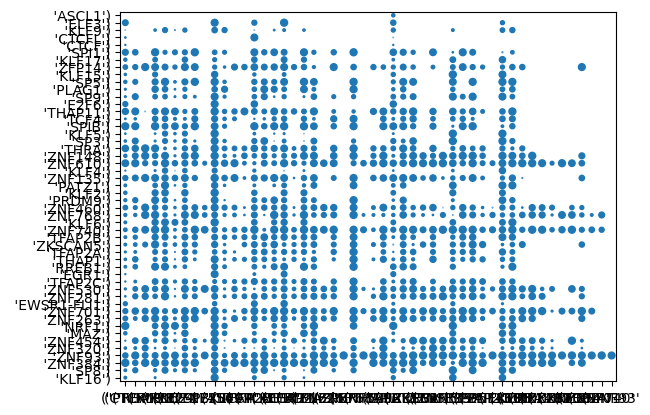

In [43]:

#create markersize column from values to better see the difference
#you probably want to edit this function depending on min, max, and range of values
df["markersize"] = np.square(df.Count) + 10
fig = plt.figure()
#plot categorical scatter plot
plt.scatter(df.Var1, df.Var2, s = df.markersize, edgecolors = "red", c = "white", zorder = 2)
#plot grid behind markers
plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [36]:
final_data_qvalues

,Unnamed: 0,Pair,Sim_Count,P_value,Obs_Count,Pair_1,Pair_2,Contain_1,Contain_2,Q_value
233,233,"('CTCF', 'KLF16')",1832,0.01832,677,('CTCF','KLF16'),True,True,700.881503
268,268,"('PRDM9', 'SP8')",21315,0.21315,811,('PRDM9','SP8'),True,True,2503.273481
396,396,"('PRDM9', 'ZNF384')",28278,0.28278,674,('PRDM9','ZNF384'),True,True,2786.278980
483,483,"('THAP11', 'ZNF93')",36120,0.36120,285,('THAP11','ZNF93'),True,True,3150.000000
625,625,"('KLF15', 'ZNF320')",194,0.00194,1476,('KLF15','ZNF320'),True,True,196.309524
...,...,...,...,...,...,...,...,...,...,...
92334,92334,"('SP8', 'ZNF701')",98032,0.98032,142,('SP8','ZNF701'),True,True,4999.100000
92383,92383,"('KLF6', 'SP3')",19989,0.19989,323,('KLF6','SP3'),True,True,2445.870921
92392,92392,"('KLF5', 'SPI1')",62883,0.62883,317,('KLF5','SPI1'),True,True,4215.343060
92446,92446,"('ZFP14', 'ZNF263')",45618,0.45618,269,('ZFP14','ZNF263'),True,True,3485.279605


In [21]:
final_data_qvalues.sort_values(["Pair_2","Pair_1"])

,Unnamed: 0,Pair,Sim_Count,P_value,Obs_Count,Pair_1,Pair_2,Contain_1,Contain_2,Q_value
68403,68403,"('ASCL1', 'ASCL1')",3641,0.03641,78,('ASCL1','ASCL1'),True,True,0.208174
89528,89528,"('ASCL1', 'CTCF')",62,0.00062,373,('ASCL1','CTCF'),True,True,0.021052
11251,11251,"('CTCF', 'CTCF')",71,0.00071,495,('CTCF','CTCF'),True,True,0.021052
11573,11573,"('ASCL1', 'CTCFL')",4,0.00004,194,('ASCL1','CTCFL'),True,True,0.003188
25960,25960,"('CTCF', 'CTCFL')",175,0.00175,450,('CTCF','CTCFL'),True,True,0.037205
...,...,...,...,...,...,...,...,...,...,...
23730,23730,"('ZNF610', 'ZNF93')",81892,0.81892,432,('ZNF610','ZNF93'),True,True,0.948563
54266,54266,"('ZNF701', 'ZNF93')",77752,0.77752,298,('ZNF701','ZNF93'),True,True,0.928219
32886,32886,"('ZNF740', 'ZNF93')",98391,0.98391,307,('ZNF740','ZNF93'),True,True,0.999820
91929,91929,"('ZNF768', 'ZNF93')",96547,0.96547,352,('ZNF768','ZNF93'),True,True,0.999820


### Group B+

## Sub-Sample Visualization and Analysis
- If you want to look at a group of samples within a group, the code below is a great to do this
- Below will allow you to visualize tabulations of the top 10 most occuring motif pairs along with its Q-value calculated from the simulations
- The code only looks at samples within a certain group (in below, we only look at A+).  If a user wants to look at different samples, please make adjustments to code for path
- One way is to create a dictionary as follows {Sample_Name_1: Sample_Path_1, Sample_Name_2: Sample_Path_2,...}.  
- Or you can simply create a list of paths

In [182]:
entries = []
### Number of Top Motifs you want to see (Can be user specified)
top_motif_count = 50
# Loop through all samples of interest
k = 0
sample_batch = "a_plus"
for sample_name in samples:
    sample_file_path = "/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/biorep_merged/results/motif_analysis/meme/fimo/"+sample_batch+"/"+sample_name+"/summarize_results/summary.txt"
    df = pd.read_csv(sample_file_path,sep="\t",header =0)
    filter_df = df[(df['motif_ID_1']!="None" ) & (df['motif_ID_2']!="None")].reset_index(drop=True)
    # Initialize the anchor slots data structure for entire set
    anchor_slots = {}
    anchor_ids = []
    # Loop through all enteries in dataframe
    for i, sr in df.iterrows():

        # Create anchor ids
        anchor1_id = '{}-{}-{}'.format(sr["chr1"], sr["start1"], sr["end1"])
        anchor2_id = '{}-{}-{}'.format(sr["chr2"], sr["start2"], sr["end2"])

        if anchor1_id not in anchor_slots:
            motifs1 = list(sr.motif_name_1.split(','))
            anchor_slots[anchor1_id] = list(set(motifs1))
            anchor_ids.append(anchor1_id)

        if anchor2_id not in anchor_slots:
            motifs2 = list(sr.motif_name_2.split(','))
            anchor_slots[anchor2_id] = list(set(motifs2))
            anchor_ids.append(anchor2_id)
    total_loops = len(df)
    total_anchors = len(anchor_slots)

    anchors_with_mps = [anchor for anchor, mp_list in anchor_slots.items() if mp_list[0] != "None"]
    total_anchors_with_mps = len(anchors_with_mps)

    anchors_without_mps = [anchor for anchor, mp_list in anchor_slots.items() if mp_list[0] == "None"]
    total_anchors_without_mps = len(anchors_without_mps)

    all_motifs = []
    for anchor, mp_list in anchor_slots.items():
        all_motifs.extend(mp_list)
    total_motif_events = len(all_motifs)
    total_motifs = len(set(all_motifs))

    ## Create list of anchor IDs ##
    filter_anchor_slots = {}
    filter_anchor_ids = []
    ## For dataset of analysis
    for i, sr in filter_df.iterrows():

        # Create anchor ids
        filter_anchor1_id = '{}-{}-{}'.format(sr["chr1"], sr["start1"], sr["end1"])
        filter_anchor2_id = '{}-{}-{}'.format(sr["chr2"], sr["start2"], sr["end2"])

        if filter_anchor1_id not in filter_anchor_slots:
            filter_motifs1 = list(sr.motif_name_1.split(','))
            filter_anchor_slots[filter_anchor1_id] = list(set(filter_motifs1))
            filter_anchor_ids.append(filter_anchor1_id)

        if filter_anchor2_id not in filter_anchor_slots:
            filter_motifs2 = list(sr.motif_name_2.split(','))
            filter_anchor_slots[filter_anchor2_id] = list(set(filter_motifs2))
            filter_anchor_ids.append(filter_anchor2_id)

    filter_total_loops = len(filter_df)
    filter_total_anchors = len(filter_anchor_slots)

    filter_anchors_with_mps = [anchor for anchor, mp_list in filter_anchor_slots.items() if mp_list[0] != "None"]
    filter_total_anchors_with_mps = len(filter_anchors_with_mps)

    filter_anchors_without_mps = [anchor for anchor, mp_list in filter_anchor_slots.items() if mp_list[0] == "None"]
    filter_total_anchors_without_mps = len(filter_anchors_without_mps)

    filter_all_motifs = []
    for anchor, mp_list in filter_anchor_slots.items():
        filter_all_motifs.extend(mp_list)
    filter_total_motif_events = len(filter_all_motifs)
    filter_total_motifs = len(set(filter_all_motifs))

    filter_total_anchors

    # Set up counter
    motif_pair_counter = Counter()

    # Loop through all enteries in dataframe
    uniq_motif_pairs = []
    for num in range(len(filter_df)):

        # Get motifs 1
        motifs1 = list(filter_df.motif_name_1[num].split(','))

        # Get motifs 2
        motifs2 = list(filter_df.motif_name_2[num].split(','))

        # Get the cross product of all 
        combos = list(it.product(motifs1, motifs2))

        # Filter data to take into account (X,Y) vs (Y,X)
        combos = [(x[0], x[1]) if x[0] < x[1] else (x[1], x[0]) for x in combos]

        # Get chromsome attributes for Chromsome 1
        chr1_name = str(filter_df["chr1"][num])
        chr1_start = str(filter_df["start1"][num])
        chr1_end = str(filter_df["end1"][num])

        # Get chromosome attributes for Chromsome 2
        chr2_name = str(filter_df["chr2"][num])
        chr2_start = str(filter_df["start2"][num])
        chr2_end = str(filter_df["end2"][num])

        # Record them in counter
        for p in combos:
            motif_pair_counter[p] += 1
            uniq_motif_pairs.append(p)
    # Get unique list of motifs
    uniq_motif_pairs = list(set(uniq_motif_pairs))
    # Count number of raw motifs across anchors
    count_df = []
    for motif,value in Counter(filter_all_motifs).items():
        entry = {"Motif" : motif,"Count":value,"Percent":(value/len(filter_all_motifs))*100}
        count_df.append(entry)
    count_df = pd.DataFrame(count_df)
    # Get frequency of motifs
    top_freq_motifs = count_df.sort_values("Percent",ascending=False).head(top_motif_count)["Motif"].tolist()
    top_motifs_list = '|'.join(top_freq_motifs)
    ### Read in data of sample
    mp_data = pd.read_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/"+sample_batch+"/"+sample_name+"/P_values_agg")
    tmp = mp_data["Pair"].str.split(",", n = 1, expand = True)
    # Split up pairs
    mp_data["Pair_1"] = tmp[0]
    mp_data["Pair_2"] = tmp[1]
    # Keep motif pairs where both motifs show up in top frequent motifs
    mp_data["Contain_1"] = mp_data["Pair_1"].str.contains(top_motifs_list)
    mp_data["Contain_2"] = mp_data["Pair_2"].str.contains(top_motifs_list)
    data_qvalues = mp_data[(mp_data["Contain_1"]==True) & (mp_data["Contain_2"]==True)]
    final_data_qvalues = data_qvalues.copy()
    # Run Q value correction
    final_data_qvalues["Q_value"] = list(multipletests(data_qvalues['P_value'], method='fdr_bh',is_sorted=False)[1])
    
    
    # Save P values less than or equal to 10%
    p_sig_values = final_data_qvalues[(final_data_qvalues['P_value']<=0.10)][["Pair","Obs_Count","Q_value"]]
    # Show top 10 occuring motif pairs
    tmpdf = p_sig_values.sort_values(by=['Obs_Count'],ascending=False).head(10)
    # Save table temporary
    tmpdf_styler = tmpdf.style.set_table_attributes("style='display:inline'" "index_names=False").set_caption(sample_name).hide(axis='index')
    entry = {"df"+str(k): [tmpdf, tmpdf_styler._repr_html_()]}
    # Append to list of tables
    entries.append(entry)
    # Graph tables after 6 entries.  Number can change be changed
    k+=1

## Example code below to show 6 tables
- Can adjust cell below as to how many tables for each individual sample you want to display

In [183]:
### Input number of tables you want to display
table_num = 6

for i in range(0,6):
    if i == 0:
        all_tables = entries[i]["df"+str(i)][1]
    else:
        all_tables = all_tables+entries[i]["df"+str(i)][1]
display_html(all_tables,raw=True)

Pair,Obs_Count,Q_value
"('ZNF460', 'ZNF460')",3208,0.000000
"('KLF5', 'ZNF460')",3171,0.142982
"('ZNF135', 'ZNF460')",3029,0.000000
"('KLF4', 'ZNF460')",2783,0.201960
"('KLF15', 'KLF5')",2046,0.191658
"('CTCF', 'PATZ1')",1892,0.003188
"('PATZ1', 'ZNF320')",1842,0.234058
"('KLF16', 'ZNF460')",1813,0.269322
"('KLF4', 'PRDM9')",1787,0.379207
"('EWSR1-FLI1', 'ZNF460')",1685,0.277270


## Generate Significant P and Q values for specified samples
- Please run the code below first before going to QQ plot generation for P-values

In [167]:
for sample_name in samples:
    ### Change path here if samples were saved elsewhere
    mp_data = pd.read_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/a_plus/"+sample_name+"/P_values_agg")
    tmp = mp_data["Pair"].str.split(",", n = 1, expand = True)
    # Split up pairs
    mp_data["Pair_1"] = tmp[0]
    mp_data["Pair_2"] = tmp[1]
    # Keep only pairs that contain both motifs that occur most frequently (Most frequent motifs can be changed in prior setting)
    mp_data["Contain_1"] = mp_data["Pair_1"].str.contains(top_motifs_list)
    mp_data["Contain_2"] = mp_data["Pair_2"].str.contains(top_motifs_list)
    data_qvalues = mp_data[(mp_data["Contain_1"]==True) & (mp_data["Contain_2"]==True)] 
    # Create copy of q values dataframe
    final_data_qvalues = data_qvalues.copy()
    # Run FDR correction
    final_data_qvalues["Q_value"] = list(multipletests(data_qvalues['P_value'], method='fdr_bh',is_sorted=False)[1])
    # Save both Q and P value dataframe and export it to a csv file
    q_sig_values = final_data_qvalues[(final_data_qvalues['Q_value']<=0.10)][["Pair","Obs_Count","P_value","Q_value"]]
    p_sig_values = final_data_qvalues[(final_data_qvalues['P_value']<=0.10)][["Pair","Obs_Count","P_value","Q_value"]]
    ### Change paths below if different sample path
    data_qvalues.to_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/a_plus/"+sample_name+"/all_pairs_values-"+sample_name +".csv",index=False)
    q_sig_values.to_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/a_plus/"+sample_name+"/Q_values_sig-"+sample_name +".csv",index=False)
    p_sig_values.to_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/a_plus/"+sample_name+"/P_values_sig-"+sample_name +".csv",index=False)

In [168]:
new_data_qvalues = data_qvalues.copy()
new_data_qvalues["Q_value"] =list(multipletests(tmpqvaluedf['P_value'], method='fdr_bh',is_sorted=False)[1])

In [264]:
# Sort out and clean data for QQ plots
#filter_df = mp_data[mp_data["P_value"]>0]
mp_data = pd.read_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/a_plus/"+sample_name+"/P_values_agg")
filter_df = mp_data
pvalues = list(filter_df['P_value'])
# Transform P-values via log 10
log10_pvalues = list(-np.log10(filter_df['P_value']))
# Create uniform theory distrobuton
unif_graph = np.random.uniform(0, 1, len(filter_df))
log_unif = list(-np.log10(unif_graph))
# Q value corretion graph (omitted for in this version.  Not useful information)
rejected, qvalues, _, _ = multipletests(filter_df['P_value'], method='fdr_bh')

log10_qvalues = -np.log10(qvalues)
# Create random values for theory distribution
norm_graph = np.random.normal(0, 1, len(filter_df))
# Create random values for theory distribution
exp_graph = np.random.exponential(1,len(filter_df))
#log_norm = list(-np.log10(norm_graph))
log_exp = list(-np.log10(exp_graph))
# QQ plot graph with log unif distribution and log 10 P values
data_q_values_qq =  pd.DataFrame({"log10_P_values":log10_pvalues,"log_unif":log_unif,"Q_value":qvalues , "log10_Q_values":log10_qvalues})
# Sort Log P values
log10_pvalues.sort()
# Sort Log Q values
log10_qvalues.sort()
pvalues.sort()
qvalues.sort()
# Sort normal distribution 
norm_graph.sort()
# Sort uniform distirbution
unif_graph.sort()
# Sort exponential distribution
exp_graph.sort()
# Sort log uniform distribution
log_unif.sort()
# Sort log exponential distribution
log_exp.sort()

data_graph_qq = pd.DataFrame({"log10_pvalue":log10_pvalues,"log10_qvalues":log10_qvalues,"log_unif":log_unif,"log_exp":log_exp,"Q-value":qvalues,"P-value":pvalues,"norm":norm_graph,"unif":unif_graph,"exp":exp_graph})

## QQ Plot for One Sample

CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged


<Axes: title={'center': 'QQ Plot P-value vs Uniform'}, xlabel='-log10 P-value Expected', ylabel='-log10 P-value Observed'>

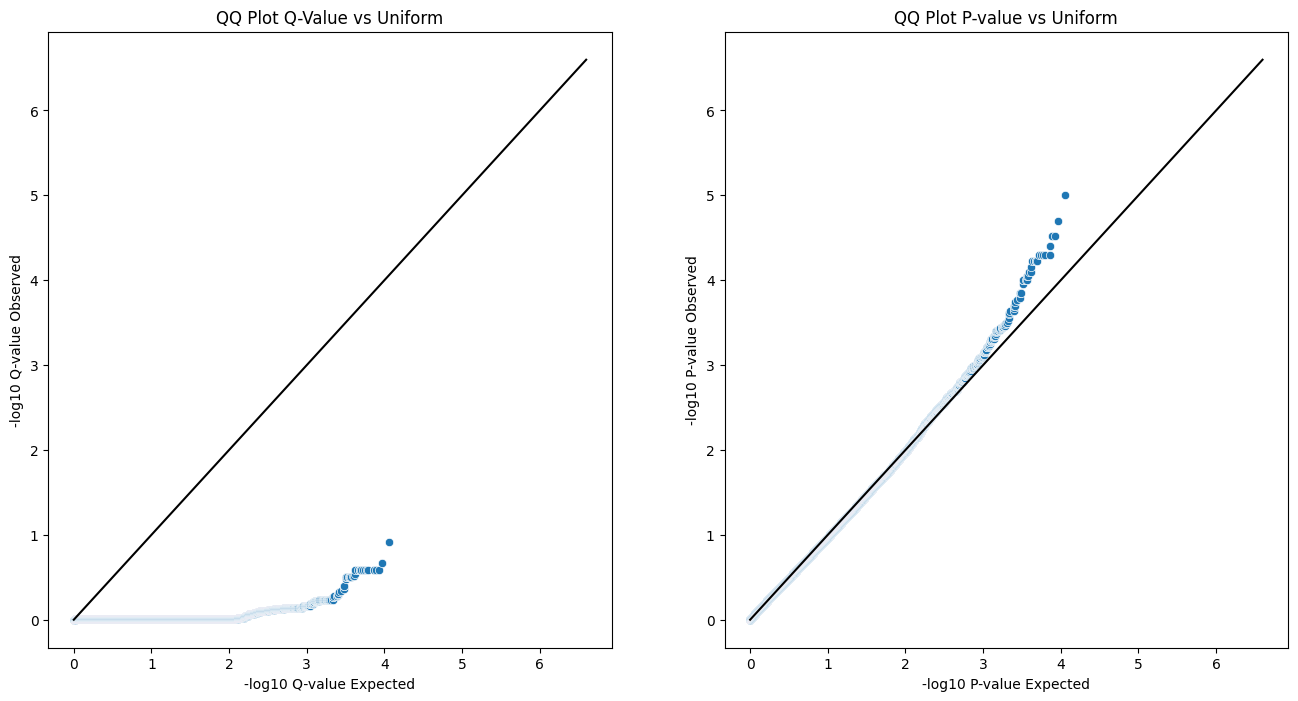

In [265]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
print(sample_name)
#Graph observed vs expected
sns.scatterplot(data=data_graph_qq, x="log_unif",y="log10_qvalues",ax=ax1).set(title="QQ Plot Q-Value vs Uniform",xlabel="-log10 Q-value Expected",ylabel="-log10 Q-value Observed")
#Graph QQ plot line
sns.lineplot(data=data_graph_qq, x="log_unif",y="log_unif",color="black",ax=ax1)
#Graph observed vs expected
sns.scatterplot(data=data_graph_qq, x="log_unif",y="log10_pvalue",ax=ax2).set(title="QQ Plot P-value vs Uniform",xlabel="-log10 P-value Expected",ylabel="-log10 P-value Observed")
#Graph QQ plot line
sns.lineplot(data=data_graph_qq, x="log_unif",y="log_unif",color="black",ax=ax2)

In [226]:
median_obs = stats.median(log10_pvalues)
median_dist = stats.median(log_unif)
print("GIF " +sample +str(median_obs/median_dist))
median(chisq)/qchisq(0.5,1)

GIF 1.084243385616086


1.1347520321971472

## QQ Plots select samples (6)
- Below calculates the GIF, if of interest on top of graphing QQ Plots

GIF CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged 1.0052821940924146
GIF Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged 1.1351108005974793
GIF CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged 1.0055163879206026
GIF Monocyte_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged 1.078490003522554
GIF Naive_B_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged 1.13306184805882
GIF Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged 1.1144941353609386


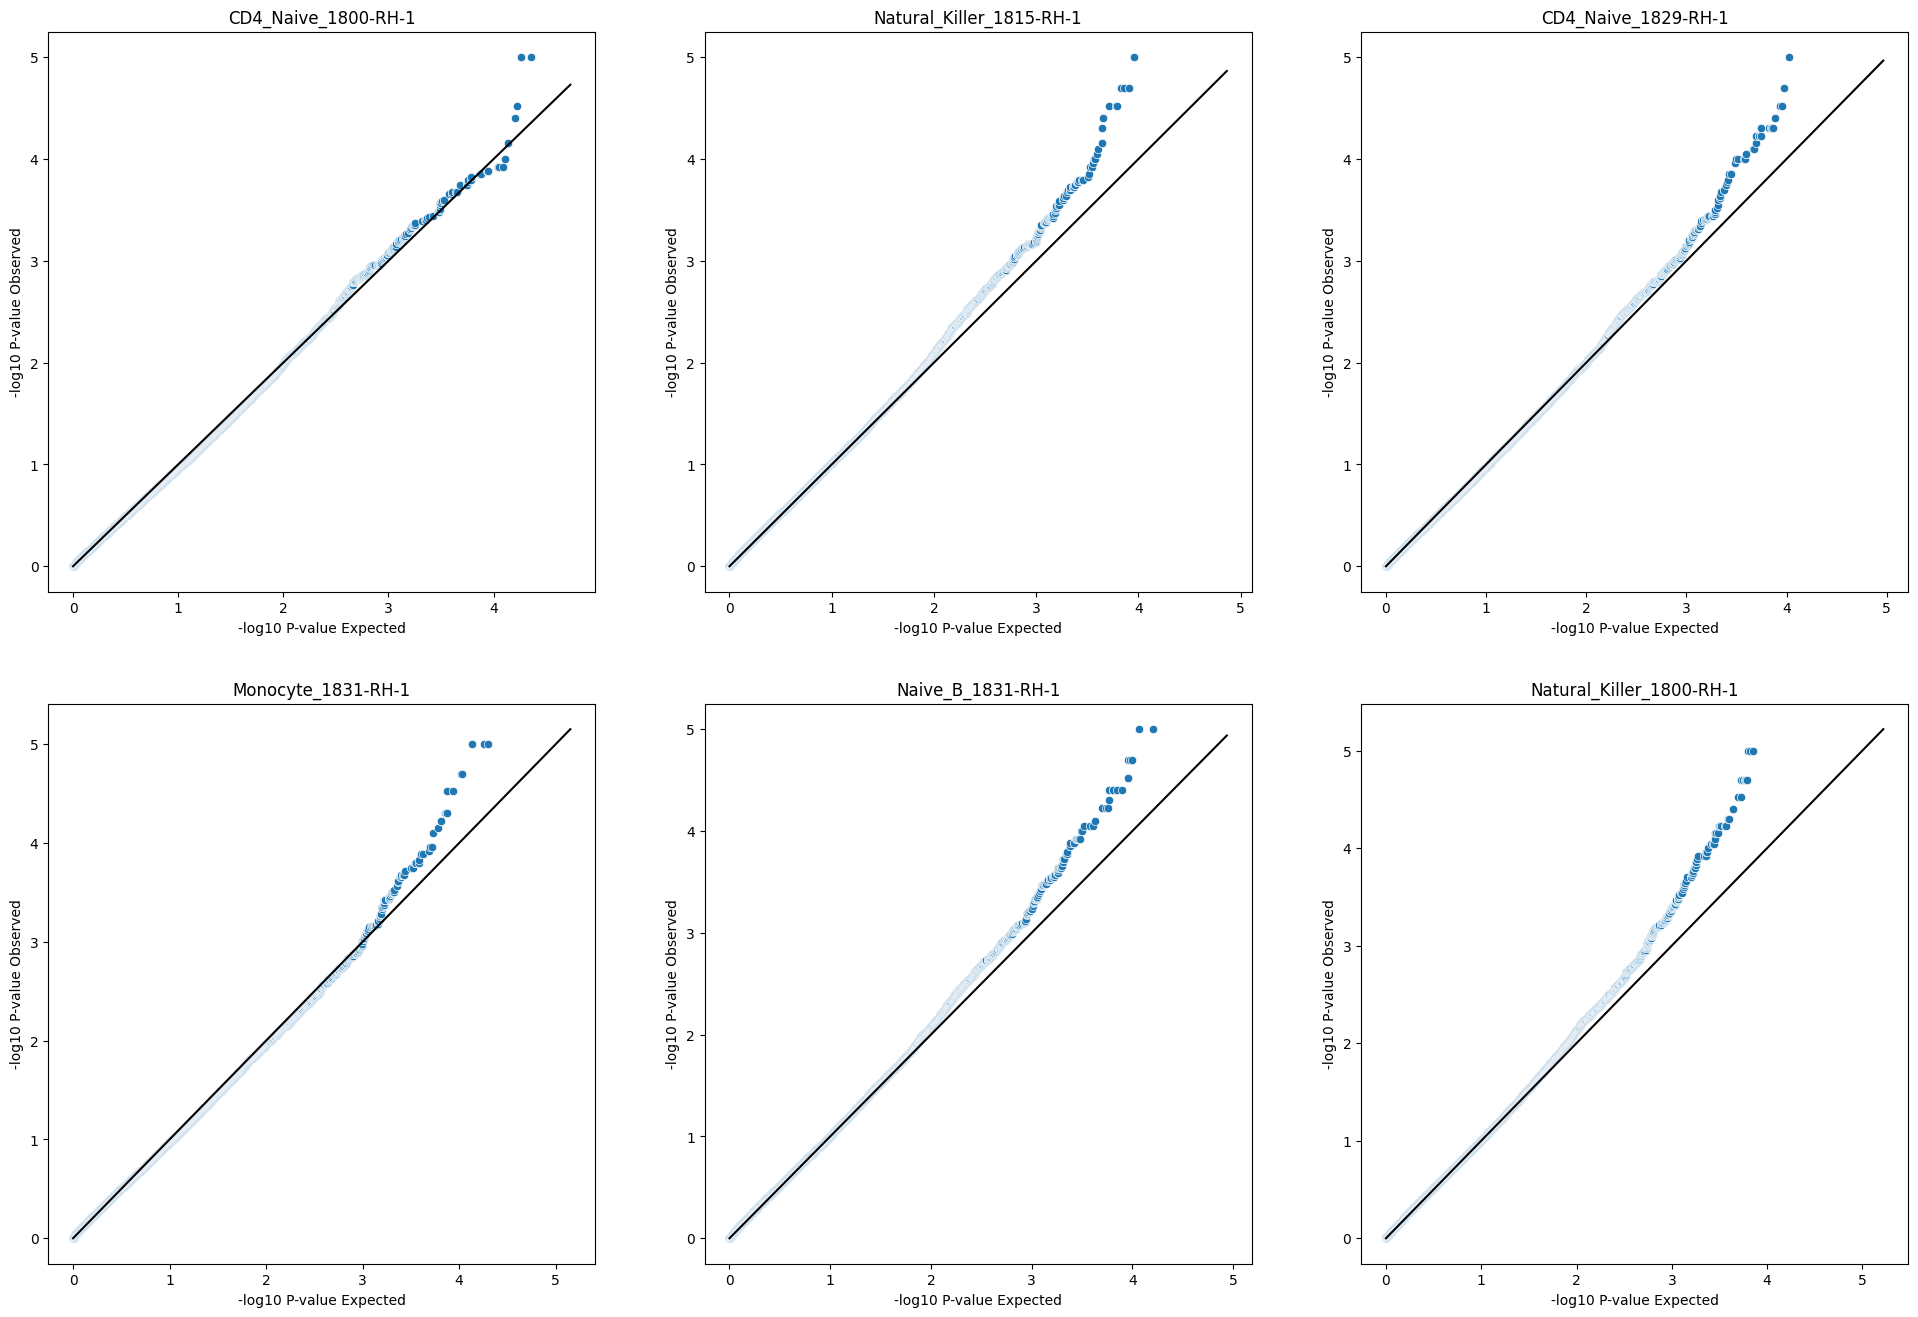

In [259]:
# import warnings

# warnings.filterwarnings('ignore')
# Sort out and clean data for QQ plots
#filter_df = mp_data[mp_data["P_value"]>0]
k = 0
### Adjust numbers below if you want more or less QQ plots
fig, axes  = plt.subplots(2,3, figsize=(24,16))

axes = axes.flatten()
for sample in samples:
    ### Change path here where samples are located.  Can also just loop through paths directly if samples are different
    tmp_data = pd.read_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/a_plus/"+sample+"/P_values_agg")
    filter_df = tmp_data
    pvalues = list(filter_df['P_value'])

    log10_pvalues = list(-np.log10(filter_df['P_value']))
    unif_graph = np.random.uniform(0, 1, len(filter_df))
    log_unif = list(-np.log10(unif_graph))

    rejected, qvalues, _, _ = multipletests(filter_df['P_value'], method='fdr_bh')

    log10_qvalues = -np.log10(qvalues)

    norm_graph = np.random.normal(0, 1, len(filter_df))

    exp_graph = np.random.exponential(1,len(filter_df))
    #log_norm = list(-np.log10(norm_graph))
    log_exp = list(-np.log10(exp_graph))

    data_q_values_qq =  pd.DataFrame({"log10_P_values":log10_pvalues,"log_unif":log_unif,"Q_value":qvalues , "log10_Q_values":log10_qvalues})

    log10_pvalues.sort()
    log10_qvalues.sort()
    pvalues.sort()
    qvalues.sort()
    norm_graph.sort()
    unif_graph.sort()
    exp_graph.sort()
    log_unif.sort()
    log_exp.sort()
    
    # Select the current axis
    ax = axes[k]
    
    chisqvalues = []
    for pvalue in pvalues:
        chisqvalues.append(scipy.stats.chi2.ppf(1-pvalue,1))
    median_chi = scipy.stats.chi2.ppf(0.5,1)
    median_obs = stats.median(chisqvalues)
    
    print("GIF "+ sample + " "+str(median_obs/median_chi))
    
    period_num = sample.find('.', 2)
    graph_title = sample[:period_num]
    data_graph_qq = pd.DataFrame({"log10_pvalue":log10_pvalues,"log10_qvalues":log10_qvalues,"log_unif":log_unif,"log_exp":log_exp,"Q-value":qvalues,"P-value":pvalues,"norm":norm_graph,"unif":unif_graph,"exp":exp_graph})
    sns.scatterplot(data=data_graph_qq, x="log_unif",y="log10_pvalue",ax=ax).set(title=graph_title,xlabel="-log10 P-value Expected",ylabel="-log10 P-value Observed")
    sns.lineplot(data=data_graph_qq, x="log_unif",y="log_unif",color="black",ax=ax)
    k+=1

## QQ Plots Graph for All samples and Inflation Factors per Sample
- Can generalize to any number of samples with slight code adjustment
- Inflation factors for each sample can be printed before graphs are shown.  Uncomment lines 46-48 in each cell

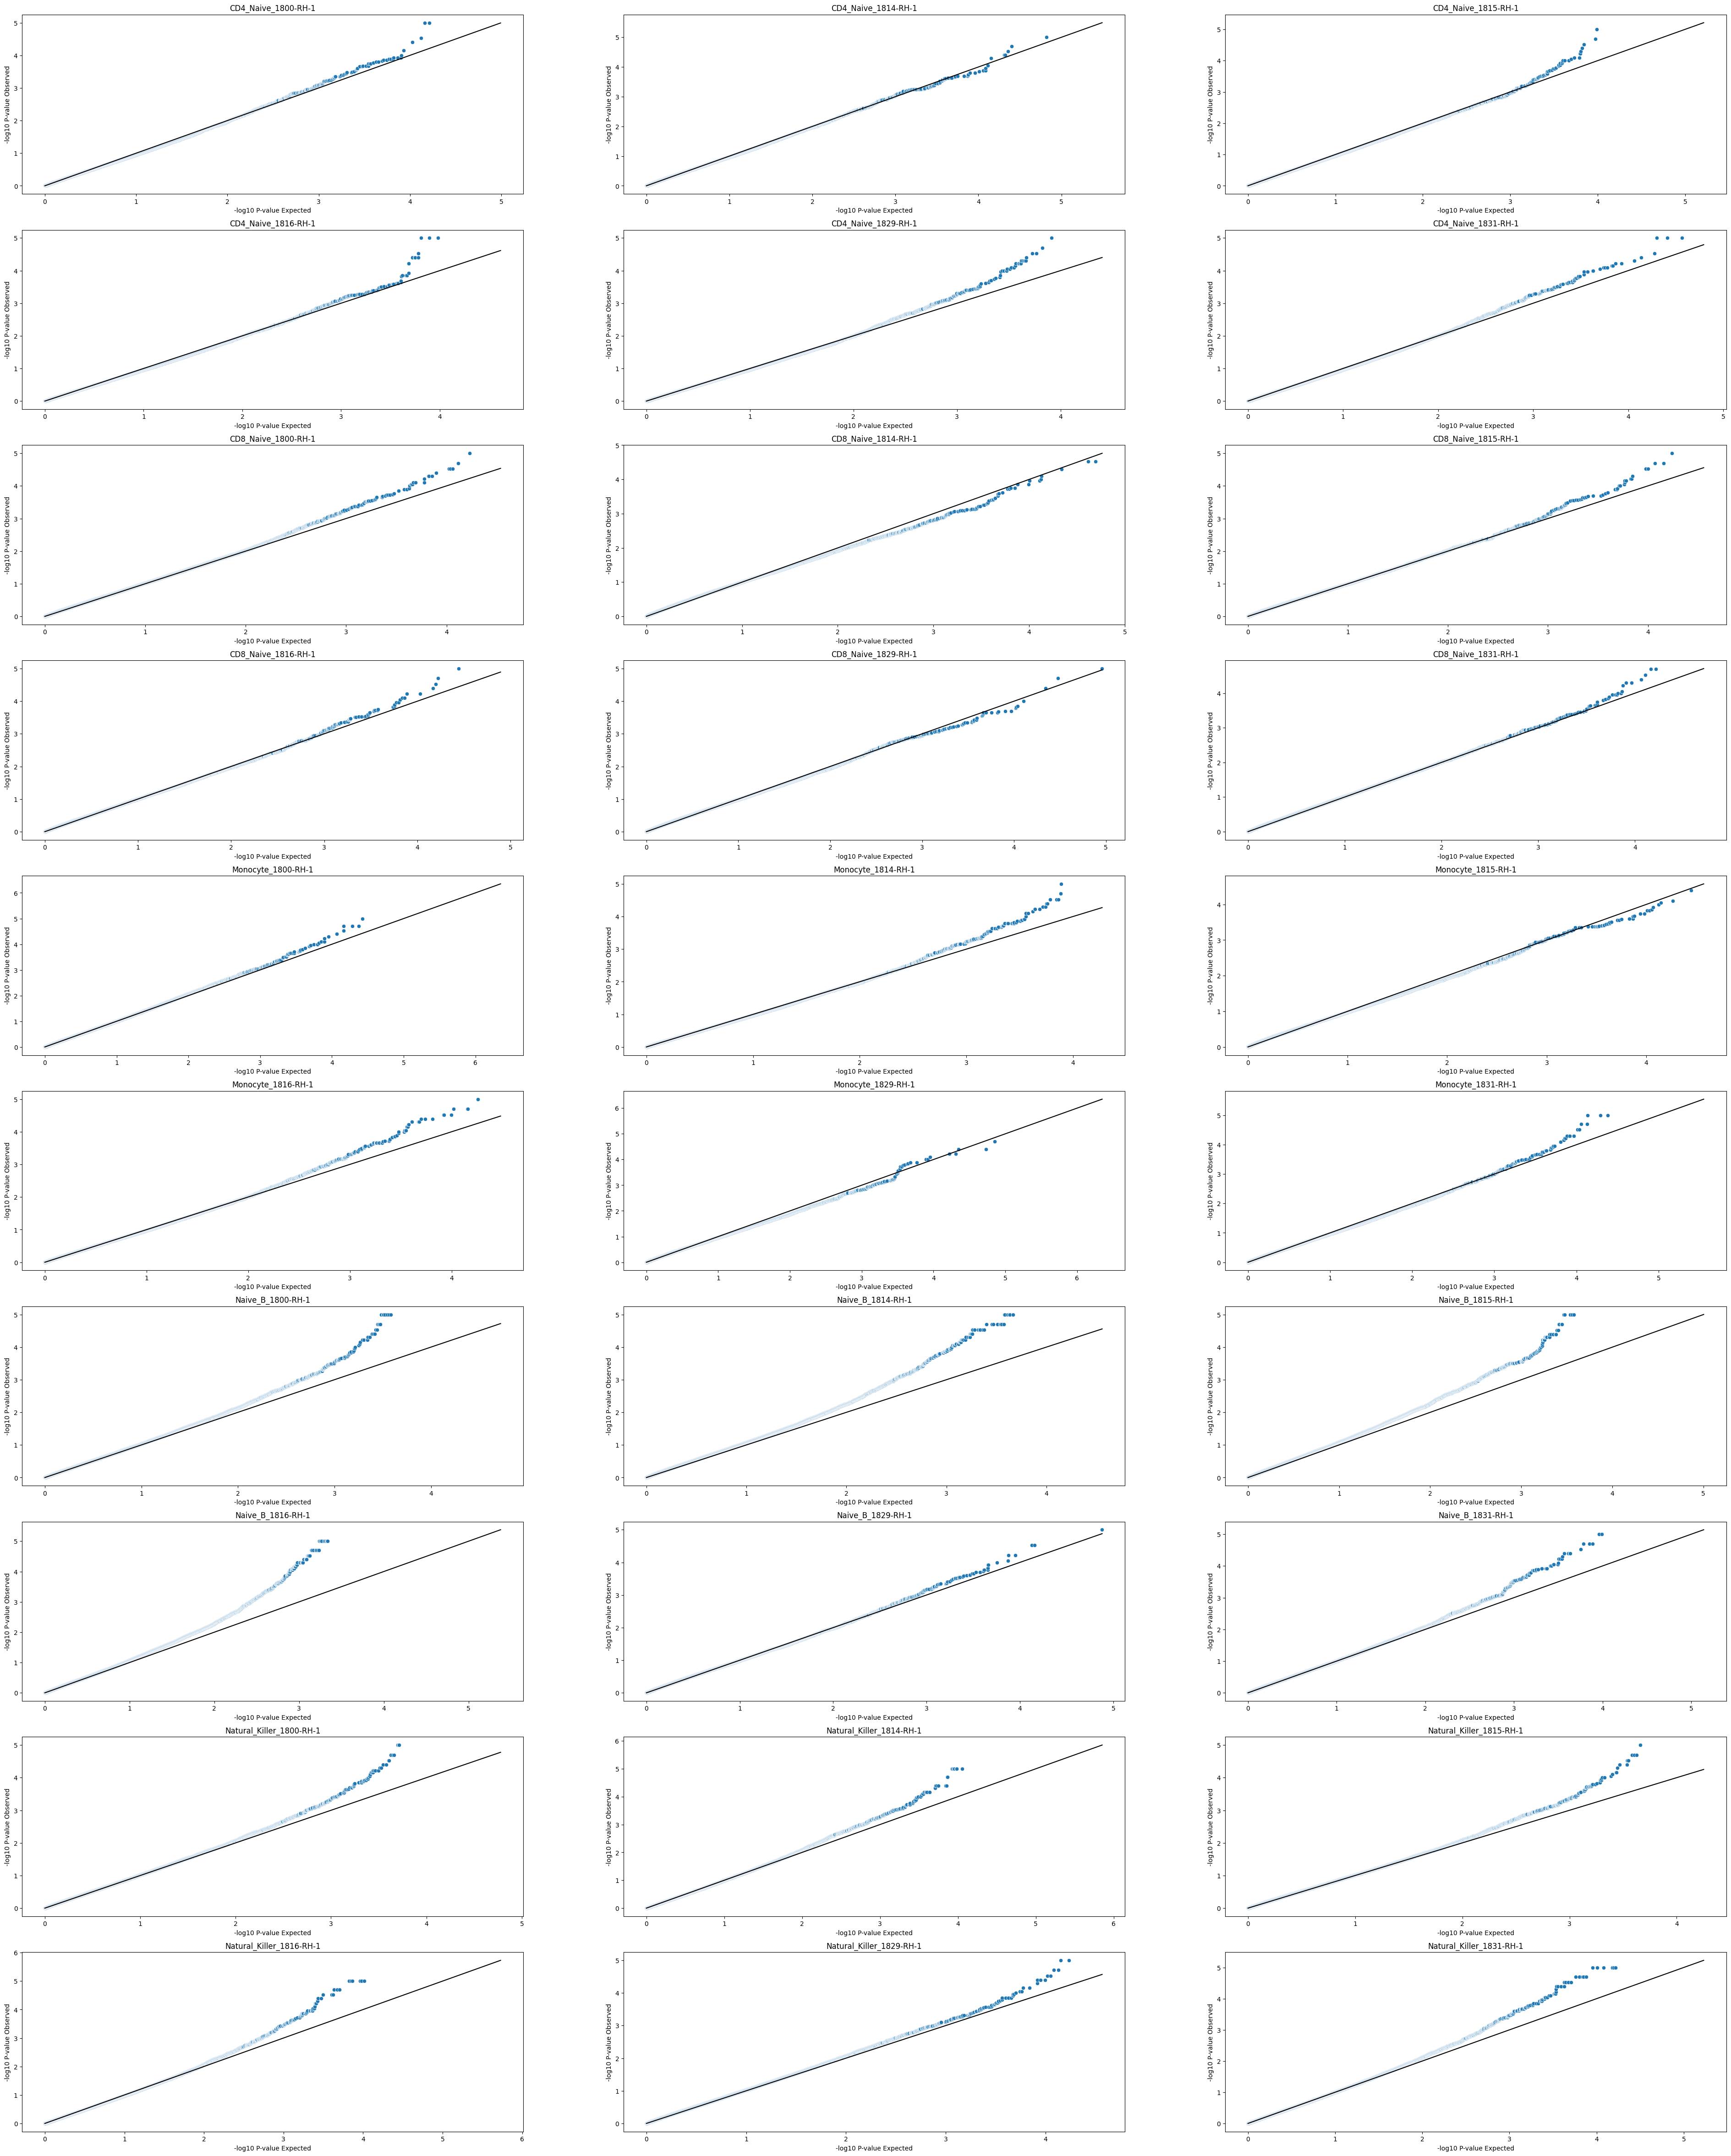

In [262]:
# import warnings

# warnings.filterwarnings('ignore')
# Sort out and clean data for QQ plots
#filter_df = mp_data[mp_data["P_value"]>0]
k = 0
### Adjust numbers below if you want more or less QQ plots
fig, axes  = plt.subplots(10,3, figsize=(48,60))

axes = axes.flatten()
for sample in complete_aplus_samples:
    ### Change path here where samples are located.  Can also just loop through paths directly if samples are different
    tmp_data = pd.read_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/a_plus/"+sample+"/P_values_agg")
    filter_df = tmp_data
    pvalues = list(filter_df['P_value'])

    log10_pvalues = list(-np.log10(filter_df['P_value']))
    unif_graph = np.random.uniform(0, 1, len(filter_df))
    log_unif = list(-np.log10(unif_graph))

    rejected, qvalues, _, _ = multipletests(filter_df['P_value'], method='fdr_bh')

    log10_qvalues = -np.log10(qvalues)

    norm_graph = np.random.normal(0, 1, len(filter_df))

    exp_graph = np.random.exponential(1,len(filter_df))
    #log_norm = list(-np.log10(norm_graph))
    log_exp = list(-np.log10(exp_graph))

    data_q_values_qq =  pd.DataFrame({"log10_P_values":log10_pvalues,"log_unif":log_unif,"Q_value":qvalues , "log10_Q_values":log10_qvalues})

    log10_pvalues.sort()
    log10_qvalues.sort()
    pvalues.sort()
    qvalues.sort()
    norm_graph.sort()
    unif_graph.sort()
    exp_graph.sort()
    log_unif.sort()
    log_exp.sort()
    
    # Select the current axis
    ax = axes[k]
    # Commented out.  Can uncomment but it takes some time
#     for pvalue in pvalues:
#         chisqvalues.append(scipy.stats.chi2.ppf(1-pvalue,1))
#     median_chi = scipy.stats.chi2.ppf(0.5,1)
#     median_obs = stats.median(chisqvalues)
    
    period_num = sample.find('.', 2)
    graph_title = sample[:period_num]
    data_graph_qq = pd.DataFrame({"log10_pvalue":log10_pvalues,"log10_qvalues":log10_qvalues,"log_unif":log_unif,"log_exp":log_exp,"Q-value":qvalues,"P-value":pvalues,"norm":norm_graph,"unif":unif_graph,"exp":exp_graph})
    sns.scatterplot(data=data_graph_qq, x="log_unif",y="log10_pvalue",ax=ax).set(title=graph_title,xlabel="-log10 P-value Expected",ylabel="-log10 P-value Observed")
    sns.lineplot(data=data_graph_qq, x="log_unif",y="log_unif",color="black",ax=ax)
    k+=1

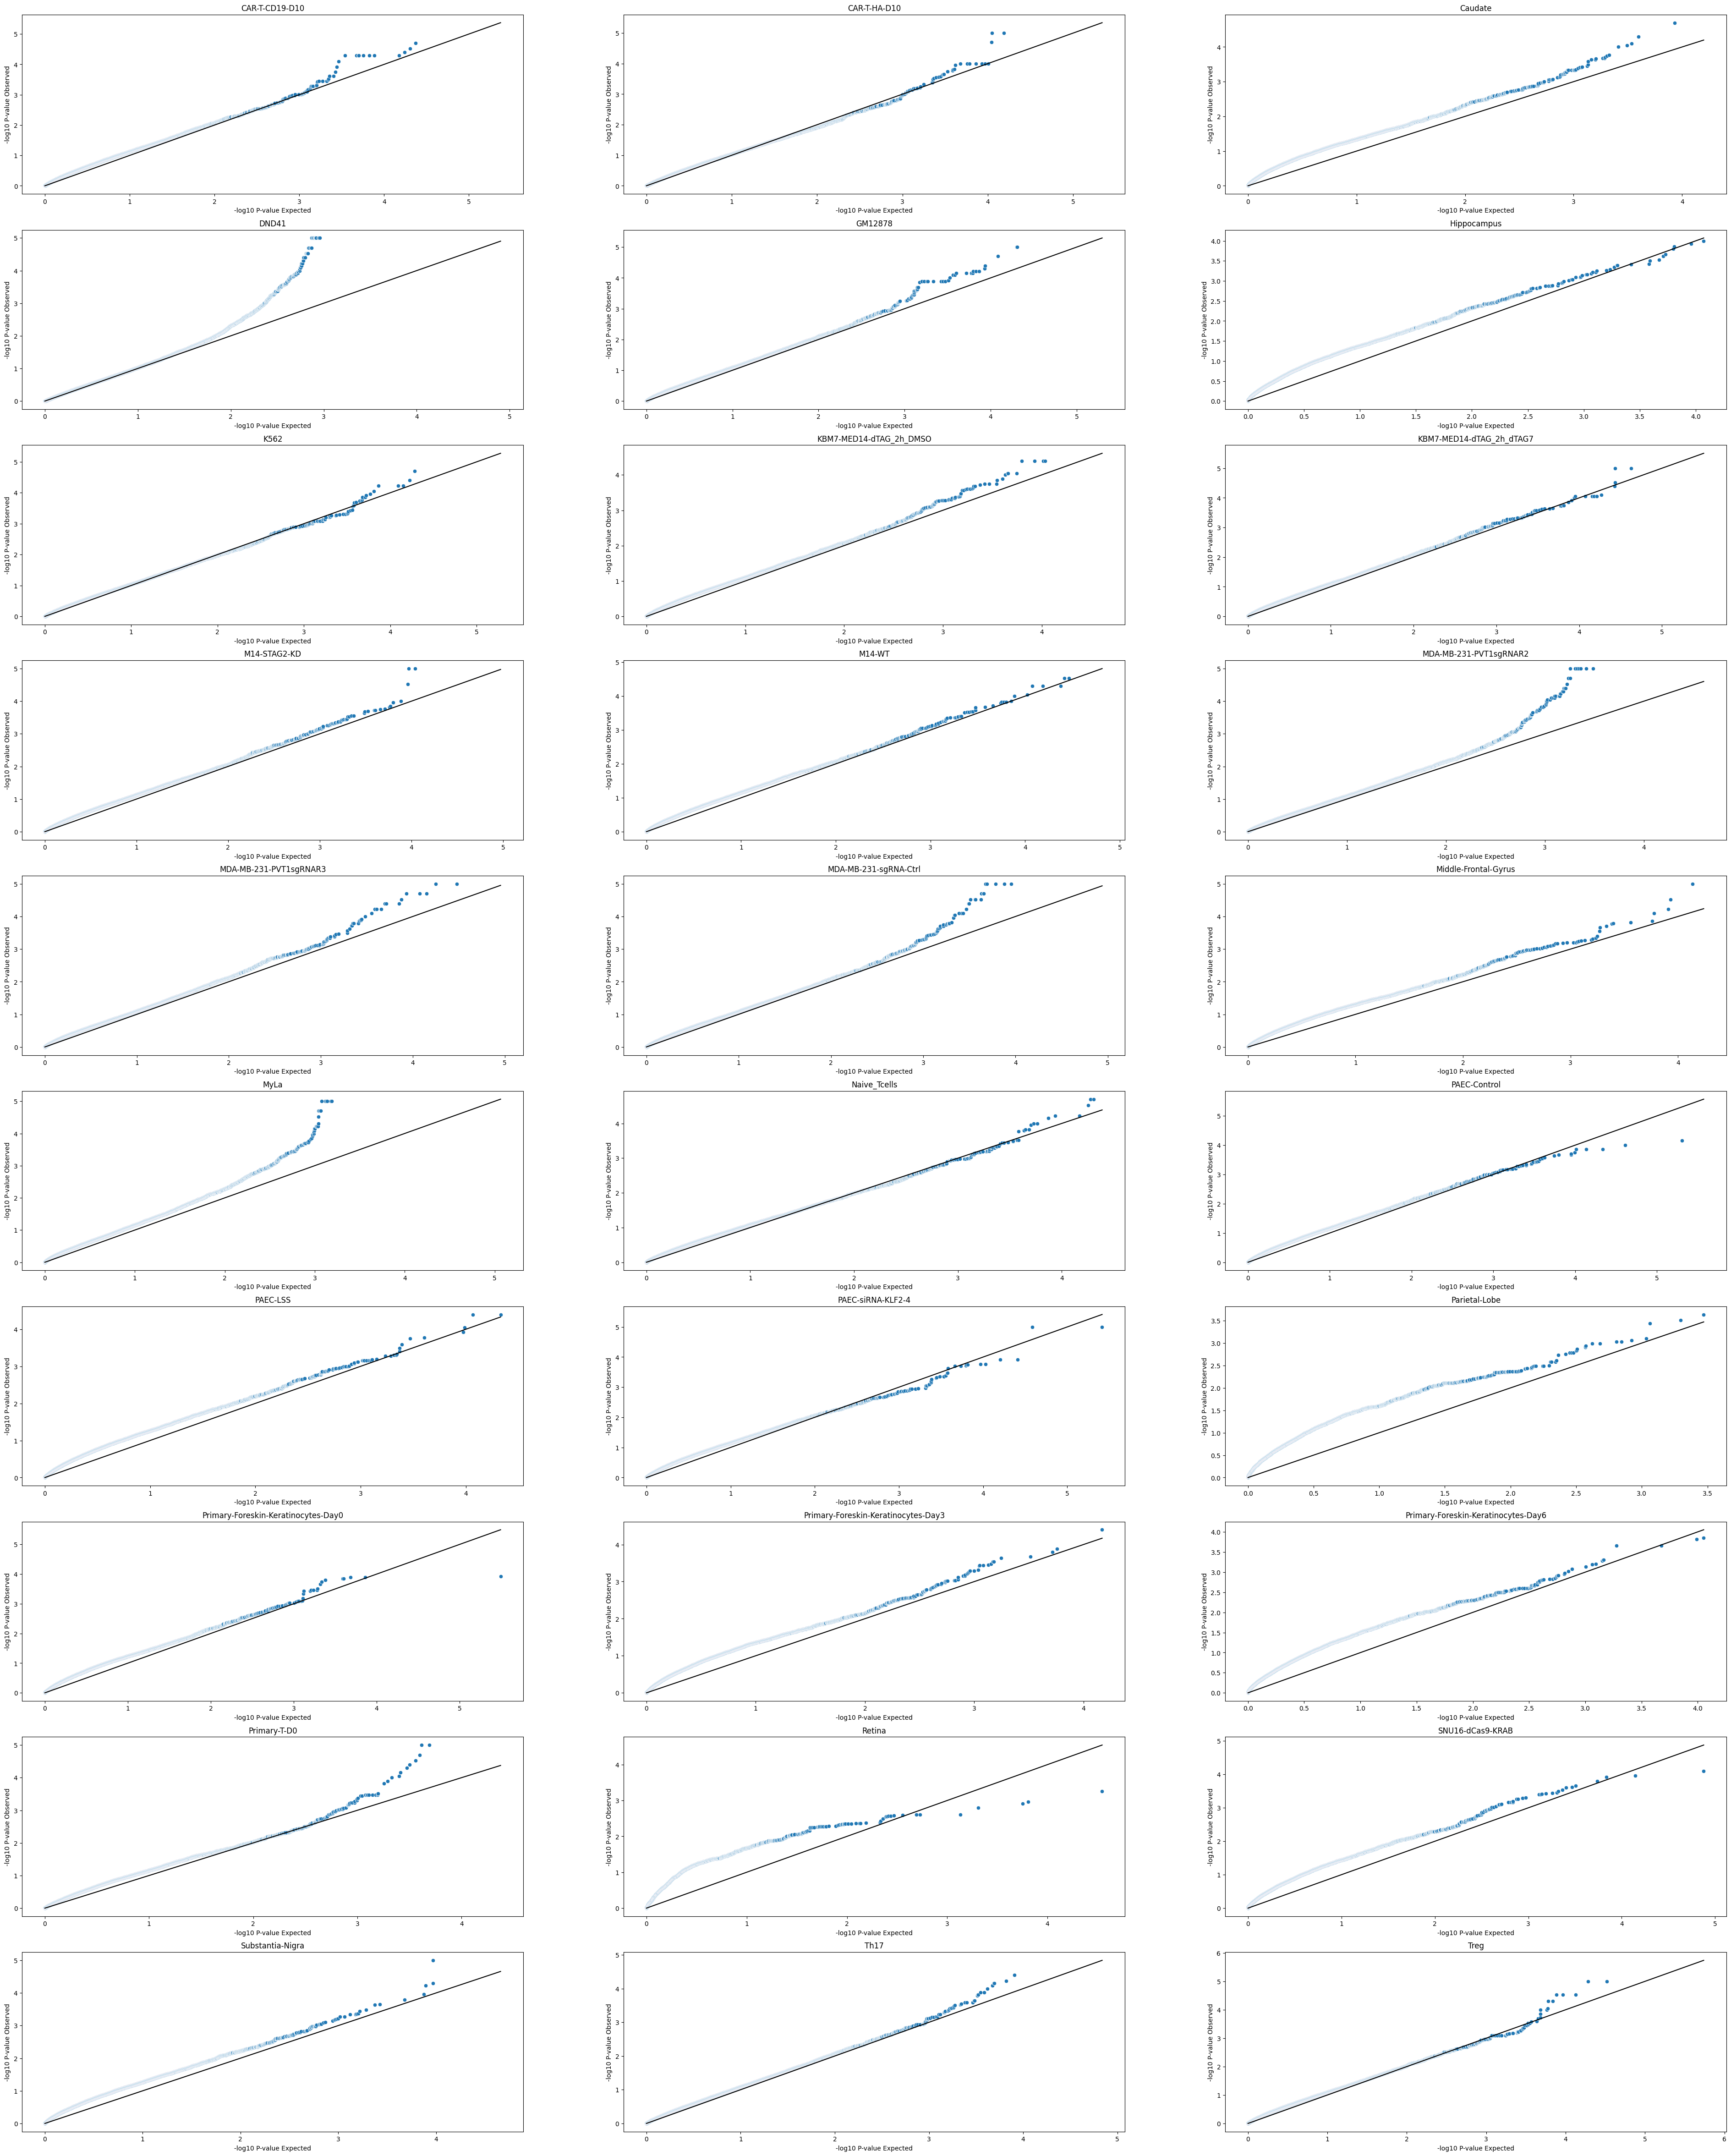

In [263]:
# import warnings

# warnings.filterwarnings('ignore')
# Sort out and clean data for QQ plots
#filter_df = mp_data[mp_data["P_value"]>0]
k = 0
### Adjust numbers below if you want more or less QQ plots
fig, axes  = plt.subplots(10,3, figsize=(48,60))

axes = axes.flatten()
for sample in complete_bplus_samples:
    ### Change path here where samples are located.  Can also just loop through paths directly if samples are different
    tmp_data = pd.read_csv("/mnt/BioHome/rignacio/rignacio/Statistics/Motif_Pairs_100000_only_chr/b_plus/"+sample+"/P_values_agg")
    filter_df = tmp_data
    pvalues = list(filter_df['P_value'])

    log10_pvalues = list(-np.log10(filter_df['P_value']))
    unif_graph = np.random.uniform(0, 1, len(filter_df))
    log_unif = list(-np.log10(unif_graph))

    rejected, qvalues, _, _ = multipletests(filter_df['P_value'], method='fdr_bh')

    log10_qvalues = -np.log10(qvalues)

    norm_graph = np.random.normal(0, 1, len(filter_df))

    exp_graph = np.random.exponential(1,len(filter_df))
    #log_norm = list(-np.log10(norm_graph))
    log_exp = list(-np.log10(exp_graph))

    data_q_values_qq =  pd.DataFrame({"log10_P_values":log10_pvalues,"log_unif":log_unif,"Q_value":qvalues , "log10_Q_values":log10_qvalues})

    log10_pvalues.sort()
    log10_qvalues.sort()
    pvalues.sort()
    qvalues.sort()
    norm_graph.sort()
    unif_graph.sort()
    exp_graph.sort()
    log_unif.sort()
    log_exp.sort()
    
    # Select the current axis
    ax = axes[k]
    # Commented out.  Can uncomment but it takes some time
#     for pvalue in pvalues:
#         chisqvalues.append(scipy.stats.chi2.ppf(1-pvalue,1))
#     median_chi = scipy.stats.chi2.ppf(0.5,1)
#     median_obs = stats.median(chisqvalues)
    
    # Select the current axis
    ax = axes[k]
    
    period_num = sample.find('.', 2)
    graph_title = sample[:period_num]
    data_graph_qq = pd.DataFrame({"log10_pvalue":log10_pvalues,"log10_qvalues":log10_qvalues,"log_unif":log_unif,"log_exp":log_exp,"Q-value":qvalues,"P-value":pvalues,"norm":norm_graph,"unif":unif_graph,"exp":exp_graph})
    sns.scatterplot(data=data_graph_qq, x="log_unif",y="log10_pvalue",ax=ax).set(title=graph_title,xlabel="-log10 P-value Expected",ylabel="-log10 P-value Observed")
    sns.lineplot(data=data_graph_qq, x="log_unif",y="log_unif",color="black",ax=ax)
    k+=1